In [2]:
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision


In [4]:
cpudevice = torch.device("cpu")

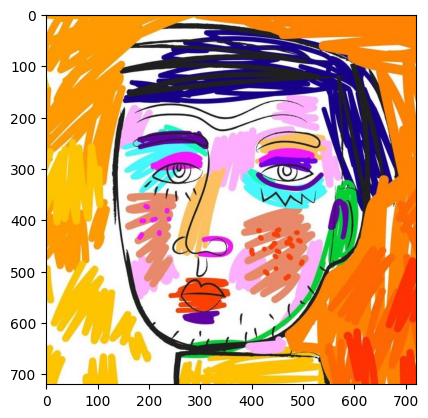

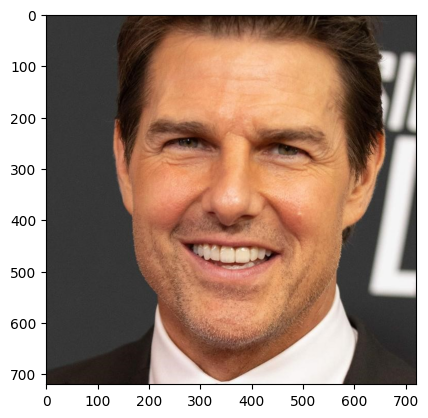

In [24]:
def gram_matrix(ip):
    num_batch, num_channels, height, width = ip.size()
    feats = ip.view(num_batch * num_channels, width * height)
    gram_mat = torch.mm(feats, feats.t()) 
    return gram_mat.div(num_batch * num_channels * width * height)

def showpic(img):
    plt.figure()
    plt.imshow(img)

def imgLoadRGB(imgPath,imgDim):
    img = Image.open(imgPath).convert('RGB')
    plt.figure()
    plt.imshow(img)   
    
    if max(img.size) <= imgDim:
        img_size = max(img.size)
    else:
        img_size = imgDim
        
    torch_transformation = torchvision.transforms.Compose([
        torchvision.transforms.Resize(img_size),
        torchvision.transforms.ToTensor()
    ])
  
    img = torch_transformation(img).unsqueeze(0)
    return img

def img2Tensor(img):
    return img.to(cpudevice,torch.float)

stylepath ="./images/facestyle.jpg"
inputpath ="./images/tom.jpeg"
scalesize = 128


imgstyle = imgLoadRGB(stylepath,128)
imginput = imgLoadRGB(inputpath,128)
#showpic(imgstyle)


In [25]:
vgg19_model = torchvision.models.vgg19(pretrained=True).to(cpudevice)
vgg19_model = vgg19_model.features

for p in vgg19_model.parameters():
    p.requires_grad_(False)

print(vgg19_model)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [26]:
conv_indices = []

for i in range(len(vgg19_model)):
    if vgg19_model[i]._get_name() == 'MaxPool2d':
        vgg19_model[i] = nn.AvgPool2d(kernel_size=vgg19_model[i].kernel_size, 
                                      stride=vgg19_model[i].stride, 
                                      padding=vgg19_model[i].padding)
    if vgg19_model[i]._get_name() == 'Conv2d':
        conv_indices.append(i)
        
conv_indices = dict(enumerate(conv_indices, 1))
print(vgg19_model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (19): Conv2d(256

In [27]:
layers = {1: 's', 2: 's', 3: 's', 4: 'sc', 5: 's'}
vgg_layers = nn.ModuleList(vgg19_model)

last_layer_idx = conv_indices[max(layers.keys())]
vgg_layers_trimmed = vgg_layers[:last_layer_idx+1]

neural_style_transfer_model = nn.Sequential(*vgg_layers_trimmed)
print(neural_style_transfer_model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


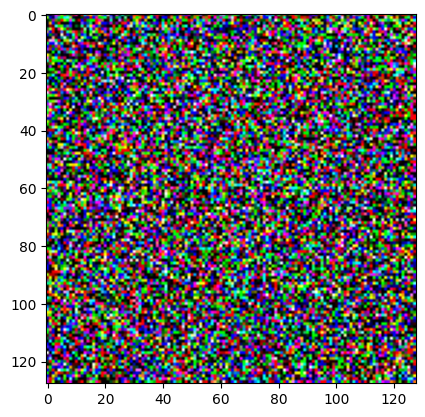

In [28]:
ip_image = torch.randn(imginput.data.size(), device=cpudevice)

plt.figure()
plt.imshow(ip_image.squeeze(0).cpu().detach().numpy().transpose(1,2,0).clip(0,1));

epoch number 50
style loss = 6.14290189743042, content loss = 7.657155990600586


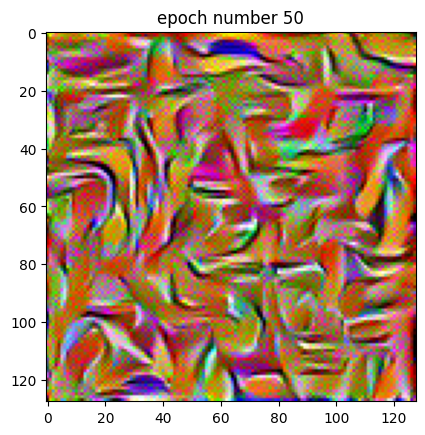

epoch number 100
style loss = 2.589240074157715, content loss = 6.140363693237305


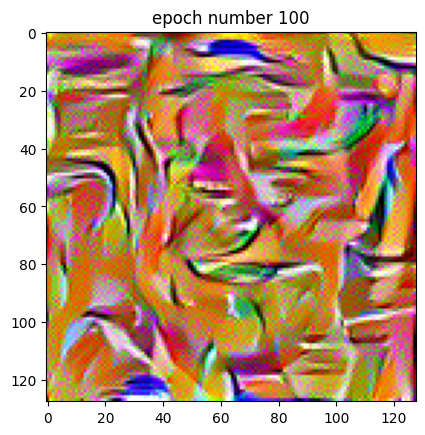

epoch number 150
style loss = 1.5580850839614868, content loss = 5.297573089599609


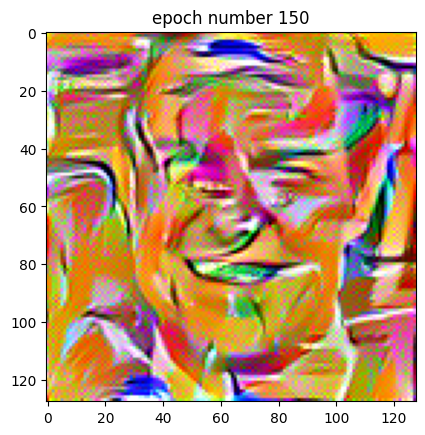

epoch number 200
style loss = 1.0630427598953247, content loss = 4.763190746307373


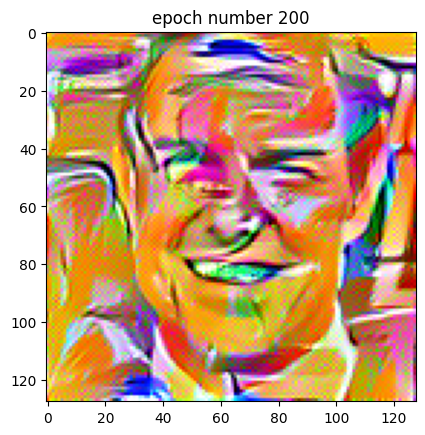

epoch number 250
style loss = 0.8254563808441162, content loss = 4.400818824768066


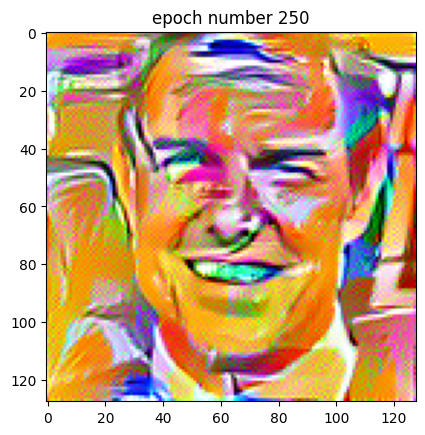

epoch number 300
style loss = 0.7059136629104614, content loss = 4.1648173332214355


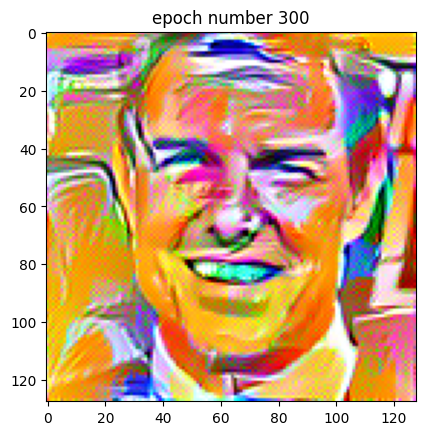

epoch number 350
style loss = 0.6353408098220825, content loss = 4.003954887390137


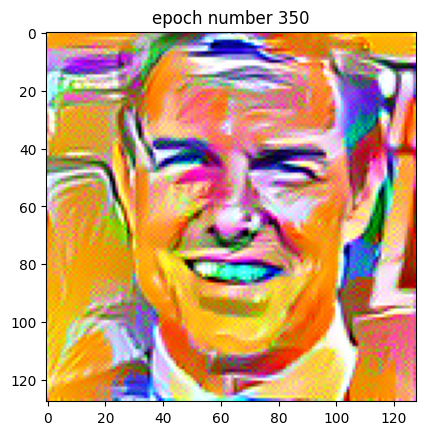

epoch number 400
style loss = 0.5877251625061035, content loss = 3.8962926864624023


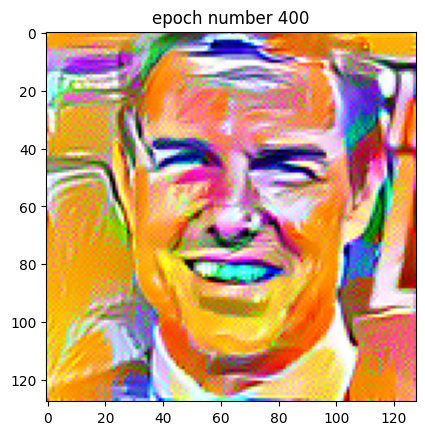

epoch number 450
style loss = 0.5586239099502563, content loss = 3.82169508934021


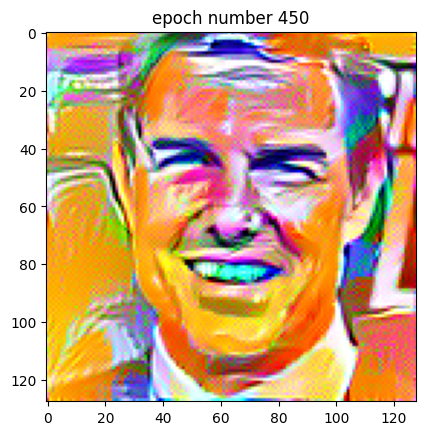

epoch number 500
style loss = 0.5368296504020691, content loss = 3.762791395187378


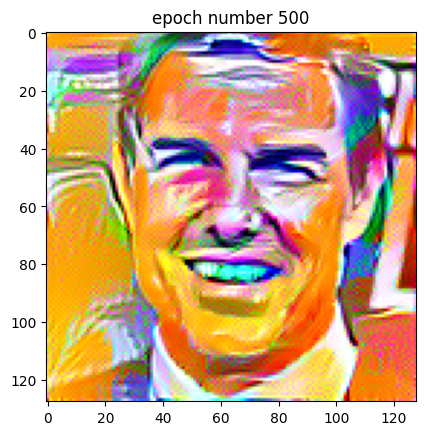

epoch number 550
style loss = 0.5187137722969055, content loss = 3.717439651489258


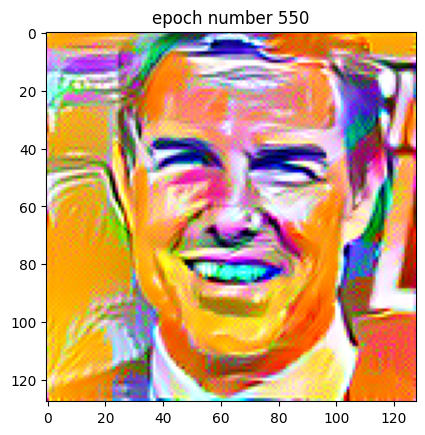

epoch number 600
style loss = 0.5065586566925049, content loss = 3.6809966564178467


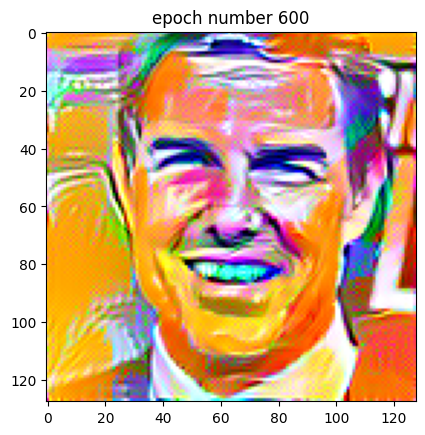

In [29]:
num_epochs=600
wt_style=1e6
wt_content=1
style_losses = []
content_losses = []
opt = optim.Adam([ip_image.requires_grad_()], lr=0.1)

for curr_epoch in range(1, num_epochs+1):
    
    ip_image.data.clamp_(0, 1)
    opt.zero_grad()
    epoch_style_loss = 0
    epoch_content_loss = 0

    for k in layers.keys():
        if 'c' in layers[k]:
            target = neural_style_transfer_model[:conv_indices[k]+1](imginput).detach()
            ip = neural_style_transfer_model[:conv_indices[k]+1](ip_image)
            epoch_content_loss += torch.nn.functional.mse_loss(ip, target)
        if 's' in layers[k]:
            target = gram_matrix(neural_style_transfer_model[:conv_indices[k]+1](imgstyle)).detach()
            ip = gram_matrix(neural_style_transfer_model[:conv_indices[k]+1](ip_image))
            epoch_style_loss += torch.nn.functional.mse_loss(ip, target)

    epoch_style_loss *= wt_style
    epoch_content_loss *= wt_content
    total_loss = epoch_style_loss + epoch_content_loss
    total_loss.backward()
    
    if curr_epoch % 50 == 0:
        print(f"epoch number {curr_epoch}")
        print(f"style loss = {epoch_style_loss}, content loss = {epoch_content_loss}")
        plt.figure()
        plt.title(f"epoch number {curr_epoch}")
        plt.imshow(ip_image.data.clamp_(0, 1).squeeze(0).cpu().detach().numpy().transpose(1,2,0))
        plt.show()
        style_losses += [epoch_style_loss]
        content_losses += [epoch_content_loss]

    opt.step()
            


(dot.exe:20456): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


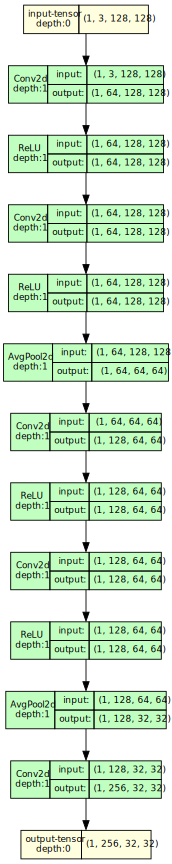

In [30]:
from torchviz import make_dot
#make_dot(y, params=dict(vgg19_model.named_parameters()))
from torchview import draw_graph
model_graph = draw_graph(neural_style_transfer_model, input_data=imginput)
model_graph.visual_graph